In [115]:
#goal is to collect some demographic information using the patient class 

# functions and classes

In [116]:
class patient:
    def __init__(self, filepath, input_fileName, lengthPtID):
        ptID = input_fileName[:lengthPtID]
        self.ptID = ptID
        self.fileName = input_fileName
        #find the demographics in one of two sheets
        # directory = os.getcwd()
        file_adds = filepath + '/' + input_fileName
        file = pd.ExcelFile(file_adds)
        sheet_Names = file.sheet_names
        if 'Cancer_Registery Data' in sheet_Names:
            #do the thing for getting patient info
            df = pd.read_excel(input_fileName, sheet_name= 'Cancer_Registery Data')
            self.ptDemographics = df
            self.amyloid_status = df.at[0,"Amyloid Status"]
            self.survival = df.at[0,"Survival Time (Months)"]
            self.ageDx = df.at[0,"Age At Diagnosis"] 
            self.sex = df.at[0,"Gender Cancer Registry"]
            self.vitalStatus = df.at[0, "Vital Status Cancer Registry"]
            self.dx = df.at[0, "Histology"]

        elif '30 Cerner Patients ' in sheet_Names:
            #do the thing for getting patient info
            df = pd.read_excel(input_fileName, sheet_name= '30 Cerner Patients ')
            self.ptDemographics = df
            self.amyloid_status = df.at[0,"Amyloid Status"]
            self.survival = df.at[0,"Survival Time (months)"]
            self.ageDx = df.at[0,"Age At Diagnosis"] 
            self.sex = df.at[0,"Gender Cerner"]
            self.vitalStatus = df.at[0, "Vital Status (Cerner)"]
            self.dx = df.at[0, "Primary Site"]


        else: print("no patient identifying information")

        #now iterate through the list of sheets to import the patient data 
        if 'Labs' in sheet_Names:
            self.labsData = pd.read_excel(input_fileName, sheet_name= 'Labs')
        else: self.labsData = False
        
        if 'amyloid in subject' in sheet_Names:
            self.echoData = pd.read_excel(input_fileName, sheet_name= 'amyloid in subject')
        else: self.echoData = False

        if 'ChemoTx' in sheet_Names:
            self.ChemoTx = pd.read_excel(input_fileName, sheet_name= 'ChemoTx')
        else: self.ChemoTx = False

        if 'Hematologic Tx' in sheet_Names:
            self.HemeTx = pd.read_excel(input_fileName, sheet_name= 'Hematologic Tx')
        else: self.HemeTx = False

        if 'Immuno Tx' in sheet_Names:
            self.ImmunoTx = pd.read_excel(input_fileName, sheet_name= 'Immuno Tx')
        else: self.ImmunoTx = False

        if 'Radiation Tx' in sheet_Names:
            self.RadTx = pd.read_excel(input_fileName, sheet_name= 'Radiation Tx')
        else: self.RadTx = False

        if 'Other Tx' in sheet_Names:
            self.OtherTx = pd.read_excel(input_fileName, sheet_name = 'Other Tx')
        else: self.OtherTx = False

        if 'Physican_Notes' in sheet_Names:
            self.MDnotes = pd.read_excel(input_fileName, sheet_name= 'Physican_Notes')
        else: self.MDnotes = False

        #to create a callable list of treatments recieved for which we have data
        tx_sheets = ['ChemoTx', 'Hematologic Tx', 'Immuno Tx']
        treatmentTypesRecieved = []

        for possible in tx_sheets:
        
            if possible in sheet_Names:
                treatmentTypesRecieved.append(possible)
        self.txRecieved = treatmentTypesRecieved

In [117]:
def FilterList(list, keyWords_primary, keyWords_secondary = ["Empty"], omit = ["Empty"]):
    #store the filtered result
    filteredList = []

    if keyWords_secondary == ["Empty"]:
        for c in list: #loop the columns
            for buzz in keyWords_primary: #loop the key words
                if buzz in c: #if the column contains the key word
                    filteredList.append(c) #add the column to the list
                    break #do not continue testing primary key words for this column
    
    else: 
        for c in list: #loop the columns
            for buzz in keyWords_primary: #loop the key words
                if buzz in c: #if the column contains the key word
                    for secondary in keyWords_secondary:
                        if secondary in c:
                            filteredList.append(c) #add the column to the list
                            break #has been added to list based on passing the seondary 
                        else:
                            pass
                    break #do not continue to check primary key words for this column
                else:
                    pass
                
    if omit != ["Empty"]: 
        for x in omit: 
            for a in filteredList:
                if x in a:
                    filteredList.remove(a)
    
    #by iterating through the column names first, we keep the order of the columns

    return filteredList 

In [118]:
#createBinary function
#createBinary function
def createBinary(df, listOfLabs, timeColumn): 
    #list of labs needs to match exactly.  
    # Filter the dataframe before inputting
    #for boolean
    df_toBool = df[listOfLabs]
    df_bool = df_toBool.notna()
    df_asint = df_bool.astype(int)
    #add column back for time 
    df_asint.insert(0, timeColumn, df[timeColumn])
    return df_asint

def createBinarySum(df, listOfLabs, timeColumn, defaxis):
    #list of labs needs to match exactly.  
    # Filter the dataframe before inputting
    #for boolean
    df_toBool = df[listOfLabs]
    df_bool = df_toBool.notna()
    df_asint = df_bool.astype(int)
    #add column back for time 
    # df_asint.insert(0, timeColumn, df[timeColumn])
    #sum across the row
    #defaxis = 0 means the columns are preserved 
    #defaxis =1 means the rows are preserved
    df_new_sum = df_asint.sum(axis = defaxis)
    return df_new_sum

In [119]:
#get list of patients from directory 
def GetListOfPatientsFromDirectory (directory, fileExtension, fileCommon, lengthID):
    #get the directory 
    listFileNames = os.listdir(directory)
    outputList = []
    #loop through list of fileNames: 
    for file in listFileNames:
        #id if the file is patient data
        if fileCommon in file and file.endswith(fileExtension):
            #trim the file name to the pt ID
            ptID = file[:lengthID]
            outputList.append(ptID)
    return outputList

In [120]:
def GetListofPTfiles(directory, fileExtension, fileCommon):
    listFileNames = os.listdir(directory)
    outListFiles = []
    #loop through file names
    for file in listFileNames:
        if fileCommon in file and file.endswith(fileExtension):
            outListFiles.append(file)
    return outListFiles

In [121]:
def getNormalValue(filteredDataColumn, skipValue = 6666):
    test = filteredDataColumn
    #input is a series
    
    for entry in test:
        if entry != skipValue:
            outputValue = entry
                # print("this is output: ", outputValue)
                #set x to True
            break
        else:
            # print("entry is blank")
            pass
    return outputValue

In [122]:
#get amyloid status dictionary inputs, sort ptIDs to lists based on amyloid status 
def getListSortedByAmyloid(amyloidDictionary, listPositive, listNegative, listOther,
                           statusPositive = "yes", statusNegative = "no"):
    for pt in amyloidDictionary.keys():
        status = amyloidDictionary[pt]
        if status == statusPositive:
            listPositive.append(pt)
        elif status == statusNegative:
            listNegative.append(pt)
        else:
            listOther.append(pt)
    #does not check for double listed patient IDs

In [123]:
#function for masking a dataframe 
def patientSectionOfFrame(start_frame, sheet_name, column_toMask, ptID):
    #ptID is a row parameter in the column_toMask
    df_use = start_frame #copy of the frame

    #first check if sheet has the column of interest
    data_top = list(start_frame.columns) #returns the headers as a list

    #determine of the sheet contains the column of interest
    if data_top.count(column_toMask) > 0: 
        #if true, now find if the patient is present
        searchForPt = start_frame[column_toMask].str.startswith(ptID).sum() #returns the number of instances of the patient
        if searchForPt > 0:
            #patient is present 
            #mask the data for the patient
            df_clean = df_use.dropna(subset= [column_toMask]) #removing NA 
            mask = df_clean[column_toMask].str.startswith(ptID) #masking for the rows where the patient has data
            df_sub_tosave = df_clean[mask] #output dataframe filtered for the patient
            return df_sub_tosave
        else:
            #the patient isn't present
            # return print("The patient " + ptID + " is not in " + sheet_name)
            pass
    else:
        #the column of interest isn't present
        # return print("The column " + column_toMask + " is not in the sheet " + sheet_name)
        pass



In [124]:
#make folder path for data
def makeFolderPathForData(parent_dir, folderName_header, folderName_common, folderName_suffix):
    #makes a new directory for your files
    #returns the folder name for use in other functions
    folderName = folderName_header + folderName_common + folderName_suffix
    path = os.path.join(parent_dir,folderName)
    if not os.path.exists(path):
        os.mkdir(path)
    return folderName

#to excel function
def outputToExcel(df_data, fileName_header, fileName_Common, fileName_suffix,
                  parent_dir, folderName, sheetName):
    fileName = fileName_header + fileName_Common + fileName_suffix
    outfile_extension = '.xlsx'
    outfile_boxplts = fileName + outfile_extension
    path_out= os.path.join(parent_dir, folderName, outfile_boxplts)

    if os.path.exists(path_out):
            #if old sheet
            with pd.ExcelWriter(path_out, mode = 'a', if_sheet_exists = 'overlay') as writer:
                    df_data.to_excel(writer, sheet_name = sheetName, index = True)
    else: 
            #new sheet
            with pd.ExcelWriter(path_out) as writer:
                    df_data.to_excel(writer, sheet_name = sheetName, index = True) #if new sheet

def outputFiguresPath(fileName_header, fileName_mid, fileName_suff, parent_dir, folderName):
        fileName_header = str(fileName_header)
        fileName_mid = str(fileName_mid)
        fileName_suff = str(fileName_suff)

        #cleaning the input to prevent addition of / to the directory
        fileName_header = fileName_header.replace("/", "-")
        fileName_mid = fileName_mid.replace("/", "-")
        fileName_suff = fileName_suff.replace("/", "-")

        fileName = fileName_header + fileName_mid +fileName_suff
        out_filename = fileName + '.tif'
        new_filepath = os.path.join(parent_dir, folderName, out_filename)
        #the output path can be used to save the figure
        return new_filepath
        # plt.savefig(new_filepath, bbox_inches = 'tight')

# libraries and dirrectories 

In [125]:
#libraries and dirrectory 
# import missingno as msno
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit


## directory navigation

In [126]:
#location of original data
starting_directory = os.getcwd()

# new_dirrectory = 'C:/Users/maega/Documents/3000 PhD/3300_BEAT Labs/Projects/Cardiac-Amyloidosis-Multiple-Myeloma/012 Processed Data/data-2024-06-05'
# # new_dirrectory = '/blue/ferrallm/mcremer/CardiacAmyloidosisMultipleMyeloma/012 Processed Data'

# machine_directory = 'C:/Users/mcremer' #the C and path to the project folder
machine_directory = 'C:/Users/maega' #when working from home machine
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '012 Processed Data/data-2024-06-05' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

new_dirrectory = path

os.chdir(new_dirrectory)

In [127]:
#updates to directory management
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '012 Processed Data' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

# parent_dir = path
outputDir = path

In [128]:
folderNameHeader = "PtDemographics_"
folderNameCommon = "2024-08-22_"
folderNameSuffix = "v1"

fileNameHeader_Known = "AL_KnownPts_"
fileNameHeader_Unknown = "AL_UnknownPts_"
fileNameHeader_Pos = "AL_PosPts_"
fileNameHeader_Neg = "AL_NegPts_"
fileNameHeader_all = "AllPts_"
fileNameCommon = "Demographics_"
fileNameSuffix = "2024-08-22_v1"

folder_data_out = makeFolderPathForData(parent_dir=outputDir, folderName_header=folderNameHeader, 
                                        folderName_common=folderNameCommon, folderName_suffix=folderNameSuffix)
# outputToExcel(*, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, 
#               fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= *)

# fig_file_out = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid=**, 
#                                  fileName_suff= fileNameSuffix, parent_dir=outputDir, folderName=folder_data_out)

folderNameOut = folder_data_out

# importing patient data


In [129]:
#importing patient data as dictionaries of dataframes
ptID_test = "E-01"

#build a dictionary of patients and their values 
ptFiles = GetListofPTfiles(new_dirrectory, '.xlsx', 'data')

patientDictAmyloid = {}
patientDictSurvival = {}
patientDictLabs = {}
patientDictEcho = {}
patientDictNotes = {}
patientDictDx = {}
patientDictVitalStatus = {}
patientDictSex = {}
patientDictAge = {}
patientDictChemo = {}
patientDictImmuno = {}
patientDictHeme = {}
patientDictRad = {}
patientDictOther = {}

#loop through the listOfPatients 
for file in ptFiles: 
    pt = patient(new_dirrectory, file, 4)
    patientDictAmyloid[pt.ptID] = pt.amyloid_status
    patientDictSurvival[pt.ptID] = pt.survival
    patientDictLabs[pt.ptID] = pt.labsData
    patientDictEcho[pt.ptID] = pt.echoData
    patientDictNotes[pt.ptID] = pt.MDnotes
    patientDictDx[pt.ptID] = pt.dx
    patientDictVitalStatus[pt.ptID] = pt.vitalStatus
    patientDictSex[pt.ptID] = pt.sex
    patientDictAge[pt.ptID] = pt.ageDx
    patientDictChemo[pt.ptID] = pt.ChemoTx
    patientDictImmuno[pt.ptID] = pt.ImmunoTx
    patientDictHeme[pt.ptID] = pt.HemeTx
    patientDictRad[pt.ptID] = pt.RadTx
    patientDictOther[pt.ptID] = pt.OtherTx
    

#calling patient to test 
ptLabsTest = patientDictLabs[ptID_test]

## sorting patients by amyloid status

In [130]:
#list of patients by amyloid status 

listPositive = []
listNegative = []
listOther = []

getListSortedByAmyloid(patientDictAmyloid, listPositive= listPositive,
                       listNegative=listNegative, listOther=listOther)

#first make a copy of the list
listALKnown = listPositive.copy()
#add the negative patients to the list of positive patients
listALKnown.extend(listNegative) 

## collecting AL, Dx, Sex, Age, Survival

In [131]:
dict_dx_codes = {
    "MGUS" : 1, 
    "MM" : 2, 
    "Multiple Myeloma" : 2,
    "MULTIPLE MYELOMA" : 2 
    #other values are going to be set to 0
}

dict_AL_codes = {
    "yes" : 2, 
    "no" : 1, 
    "unk" : 3,
}

dict_sex_codes = {
    "Male" : 0,
    "MALE": 0, 
    "Female" : 1, 
    "FEMALE" : 1,  
}

dict_of_codes = {"AL": dict_AL_codes, 
                 "Dx": dict_dx_codes, 
                 "Sex": dict_sex_codes}

dict_of_data = {"AL": patientDictAmyloid, 
                "Dx": patientDictDx, 
                "Sex": patientDictSex}

dict_encoded_pt_AL_Dx_sex = {}

for ptID in list(patientDictDx.keys()):
    listPtValues = []
    for key in list(dict_of_codes.keys()):
        LocalValue = ''
        for code in dict_of_codes[key]:
            if code in dict_of_data[key][ptID]:
                # print(ptID, " code: ", code)
                LocalValue = dict_of_codes[key][code] 
        if LocalValue == '': 
            listPtValues.append(0)
        else:
             listPtValues.append(LocalValue)
    # print("patient values: ", listPtValues)
    dict_encoded_pt_AL_Dx_sex[ptID] = listPtValues

df_all_encoded_AL_dx_sex = pd.DataFrame.from_dict(dict_encoded_pt_AL_Dx_sex, orient='index', columns=["Amyloid Status", "Dx", "Sex"])

#getting age and survival 
df_all_ages = pd.DataFrame.from_dict(patientDictAge, orient= 'index', columns= ['Age'])
df_all_survival = pd.DataFrame.from_dict(patientDictSurvival, orient='index', columns= ['Survival (in months)'])

#combining for demographics

df_all_demographics = pd.concat([df_all_encoded_AL_dx_sex, df_all_ages, df_all_survival], axis= 1)


In [132]:
#saving the dictionary from encoding the data
df_dataCoding = pd.DataFrame.from_dict(dict_of_codes, orient='index')


## tx information

In [133]:
#collecting information about treatments patient has recieved

#each condition appends 2 numbers
#first number is a boolean if the patient has data
#the second number is the total number of treatments the patient has had.

#list of dictionaries 
pt_Tx_dict_to_iterate = [patientDictChemo, patientDictImmuno, patientDictHeme, patientDictRad, patientDictOther]

dictPt_Tx_Summary = {}

for ptID in list(patientDictAge.keys()): 
    #get the treatment information for that patient
    ptTxList = [] 
    for tx in pt_Tx_dict_to_iterate:
        if type(tx[ptID]) != bool: 
            ptTxList.append(1)
            #get the length of the data
            numb_txs = len(tx[ptID])
            ptTxList.append(numb_txs)
        else:
            ptTxList.append(0)
            ptTxList.append(0)

    dictPt_Tx_Summary[ptID] = ptTxList

df_all_tx_summary = pd.DataFrame.from_dict(dictPt_Tx_Summary, orient='index')
df_all_tx_summary.columns = ["ChemoTx", "ChemoTx Number", "ImmunoTx", "ImmunoTx Number", "HemeTx", "HemeTx Number", 
"RadTx", "RadTx Number", "OtherTx", "OtherTx Number"]

# Collecting labs by time

### labs of interest

In [134]:
columnsToUse =["Creatinine Result(mg/dL)", "Potassium Result(mmol/L)", "total CO2 Result", "Chloride Result(mmol/L)", "Calcium Result(mg/dL)",
               "Sodium Result(mmol/L)", "Glucose Result", "BUN Result(mg/dL)", "Platelet Count Result(k/uL)", "Hemoglobin Result",
               "MCHC Result", "MCV Result", "MCH Result(pg)", "HCT Result", "RBC Result", "WBC Result(k/uL)", "Albumin Result(gm/dL)",
               "Neutrophil Result", "Monocyte Result", "Pct. Neutrophil Result", "Pct. Mono Result", "Total Serum Protein Result",
               "Pct. Immature Gran Auto Result", "Pct. Immature Gran Auto Result", "Nucleated RBC Result", "AST Result(U/L)", "ALT Result(U/L)",
               "Serum Electrophoresis Alpha 1 Result", "Serum Electrophoresis Alpha 2 Result", "Serum Electrophoresis Beta Result", 
               "Serum Electrophoresis Gamma Result", "Albumin Electrophoresis Result", "LDH Result(U/L)", "Kappa Free Light Chains Result (mg/L)", 
               "Beta-2-Microglobulin Result", "NT Pro BNP (B-Type Natriuretic Peptide)", "Troponin-T", "RDW Result", "Pct. Nucleated RBC/100 WBC Result",
               "Bilirubin Result", "Ferritin Result(ng/mL)", "Serum Immunologic IgG Result", "Reticulocyte Percentage Result", 
               "Serum Immunologic IgA Result Value Result", "Serum Immunologic IgM Result", "Erythrocyte SR Result", "Urine Albumin Outcome Result", 
               "B12 Result (pg/mL)", "TIBC Result (ug/dL)", "Urinalysis Alpha2 Globulin Result", "Urinalysis Alpha1 Globulin Result", 
               "Urinalysis Beta Globulin Result", "Lymphocyte Result", "Eosinophil Result", "Basophil Result", "Pct. Lymphocyte Result", 
               "Pct. Eosinophil Result", "Pct. Basophil Result", "Urinalysis M Spike Result", "Urinalysis M Spike Percent Result", "Serum Electrophoresis M Spike Result"]
# labs atleast 76% filled across all patients.  Addition of serum and urine M spike measures

In [135]:
#dictionary for the filtered data and the list of columnNames
#this enables filtering of the patient data as its own block of code
dictOfFilteredLabs = {}

#other input values to set outside of loop 
x_column_name = "RelTime(Days)"
#creating dictionaries for all patients in the dirrectory 

#also collects the column names of interest 

for ptID in (patientDictLabs.keys()):
    #to collect and filter the patient labs into a dictionary
    df_Labs = patientDictLabs[ptID]

    orig_columns = df_Labs.columns

    #filter the patient labs
    # columnNames = FilterList(orig_columns, keyWords_primary = ['Result', 'Troponin-T', 'BNP'],  
    #                             omit = ['Method', 'ABO', 'Dohle', "Toxic Granulation", "D Dimer Result",
    #                                     "Urine Color Result", "Urine Leukocyte Esterase Result",
    #                                     "Urine Nitrite Result", "Urinalysis Squamous Epithelial Cells Result (/hpf)",
    #                                     "(/hpf)", "Hep B", "Hep B Surf Ag Result", "Hep C", "Hep C Ab Screen Result",
    #                                     "Hypersegmentation Result", "HCG Result (Serum)", "Coombs Test Result",
    #                                     "HIV Result"])
    columnNames = FilterList(orig_columns, keyWords_primary = columnsToUse,
                             omit = ['Method', 'ABO', 'Dohle', "Toxic Granulation", "D Dimer Result",
                                        "Urine Color Result", "Urine Leukocyte Esterase Result",
                                        "Urine Nitrite Result", "Urinalysis Squamous Epithelial Cells Result (/hpf)",
                                        "(/hpf)", "Hep B", "Hep B Surf Ag Result", "Hep C", "Hep C Ab Screen Result",
                                        "Hypersegmentation Result", "HCG Result (Serum)", "Coombs Test Result",
                                        "HIV Result", "Urine Glucose Result(mg/dL)"])
    
    
    testNames = [x_column_name]
    testNames.extend(columnNames) #addition of time label


    ptLabs_results= df_Labs[testNames] #new data frame of just results

    #troponin contains strings which mess up plotting 
    df_Labs_results_2 = ptLabs_results
    # for col in columnNames:
    #     df_Labs_results_2[col] = ptLabs_results[col].apply(lambda x: 0 if isinstance(x, str) else x)
    df_Labs_results_2["Troponin-T"] = ptLabs_results["Troponin-T"].apply(lambda x: 0 if isinstance(x, str) else x)
    df_Labs_results_2["NT Pro BNP (B-Type Natriuretic Peptide)"] = ptLabs_results["NT Pro BNP (B-Type Natriuretic Peptide)"].apply(lambda x: 0 if isinstance(x, str) else x)
    # df_Labs_results_2['Anisocytosis Result'] = df_Labs_results_2['Anisocytosis Result'].replace({'1+': 1, '2+': 2,'3+': 3})
    # df_Labs_results_2['Macrocytes Result'] = df_Labs_results_2['Macrocytes Result'].replace({'1+': 1, '2+': 2,'3+': 3})

    ptLabs_results_2 = df_Labs_results_2
    dictOfFilteredLabs[ptID] = ptLabs_results_2


C:\Users\maega\AppData\Local\Temp\ipykernel_49240\688626366.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Labs_results_2["Troponin-T"] = ptLabs_results["Troponin-T"].apply(lambda x: 0 if isinstance(x, str) else x)
C:\Users\maega\AppData\Local\Temp\ipykernel_49240\688626366.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Labs_results_2["NT Pro BNP (B-Type Natriuretic Peptide)"] = ptLabs_results["NT Pro BNP (B-Type Natriuretic Peptide)"].apply(lambda x: 0 if isinstance(x, str) else x)
C:\Use

## labs proximal to diagnostic imaging

### collect dx imaging dates and convert to days

In [136]:
EchoTimeColumn ='time from diagnosis to first echo (months)'
MRItimeColumn = 'time from dagnosis to MRI (months)'
imagingDates = {}
dict_imagingDates_Days = {}
for pt in patientDictEcho:
    ptEchoData = patientDictEcho[pt]
    patientEchoDate = ptEchoData.at[0,EchoTimeColumn]
    patientMRIDate = ptEchoData.at[0,MRItimeColumn]

    print(pt , " echo date: ", patientEchoDate, " type ",type(patientEchoDate) )
    print(pt, " MRI date: ", patientMRIDate, " type ", type(patientMRIDate))
    if type(patientEchoDate) != str and np.isnan(patientEchoDate) == False:
        # np.isnan(patientEchoDate) == False and type(patientEchoDate) != str:
        imagingDates[pt] = patientEchoDate
        #convert from months to days
        dict_imagingDates_Days[pt] = patientEchoDate * 30

    #only if the patient doesn't have an echo date do you check for an MRI date
    elif type(patientMRIDate) != str and np.isnan(patientMRIDate) == False:
        imagingDates[pt] = patientMRIDate
        #convert from months to days
        dict_imagingDates_Days[pt] = patientMRIDate * 30



A-02  echo date:  6.333333333333333  type  <class 'numpy.float64'>
A-02  MRI date:  7  type  <class 'numpy.int64'>
A-03  echo date:  5.5  type  <class 'numpy.float64'>
A-03  MRI date:  nan  type  <class 'numpy.float64'>
B-01  echo date:  230.5666666666667  type  <class 'numpy.float64'>
B-01  MRI date:  nan  type  <class 'numpy.float64'>
B-02  echo date:  4.433333333333334  type  <class 'numpy.float64'>
B-02  MRI date:  nan  type  <class 'numpy.float64'>
B-03  echo date:  2.333333333333333  type  <class 'numpy.float64'>
B-03  MRI date:  8.133333333333333  type  <class 'numpy.float64'>
C-01  echo date:  1.666666666666667  type  <class 'numpy.float64'>
C-01  MRI date:  2  type  <class 'numpy.int64'>
C-02  echo date:  3.233333333333333  type  <class 'numpy.float64'>
C-02  MRI date:  nan  type  <class 'numpy.float64'>
C-03  echo date:  -0.03333333333333333  type  <class 'numpy.float64'>
C-03  MRI date:  -0.03333333333333333  type  <class 'numpy.float64'>
D-01  echo date:  165.1333333333333 

### collect data nearest diagnostic imaging date

In [137]:
#create dictionary for storing the instance of patient labs nearest to the echo date and most complete
dict_labs_EchoAdj = {}

for ptID in (dictOfFilteredLabs.keys()):

    if ptID in dict_imagingDates_Days: 
        #get echo value in days
        imagingDate = dict_imagingDates_Days[ptID]

        #get patient lab data 
        ptData = dictOfFilteredLabs[ptID]

        #create copy 
        ptDataCopy = ptData.copy()

        #find the time difference between lab and echo date
        ptDataCopy['time_diff']= [np.absolute(time - imagingDate) for time in ptDataCopy["RelTime(Days)"]]

        #find the completeness of data in the row
        ptDataCopy['completeness'] = ptDataCopy.notna().astype(int).sum(axis=1)

        #sort by 'time_diff' and then 'completeness'
        df_sorted = ptDataCopy.sort_values(by= ['time_diff', 'completeness'], ascending = [True, False])

        # #exporting these values to a sheet so that they can be compared later 
        # outputToExcel(df_data = df_sorted, fileName_header= "AllPts", fileName_Common= fileNameCommon + "_sorted", fileName_suffix= outputSheet_Suffix,
        #     parent_dir= outputDir, folderName=folderNameOut, sheetName= ptID)

        #drop columns
        df_sorted.drop(['time_diff', 'completeness'], axis = 1, inplace = True)

        #pull the top row
        nearestLabs = df_sorted.iloc[0]

        #adding to dictionary 
        dict_labs_EchoAdj[ptID] = nearestLabs
    
    # if ptID not in dict_imagingDates_Days:
    #     #get patient lab data 
    #     ptData = dictOfFilteredLabs[ptID]

    #     #create copy 
    #     ptDataCopy = ptData.copy()

    #     #find the completeness of data in the row
    #     ptDataCopy['completeness'] = ptDataCopy.notna().astype(int).sum(axis=1)

    #     #sort by 'time_diff' and then 'completeness'
    #     df_sorted = ptDataCopy.sort_values(by= ['completeness'], ascending = [False])

    #     # #exporting these values to a sheet so that they can be compared later 
    #     # outputToExcel(df_data = df_sorted, fileName_header= "AllPts", fileName_Common= fileNameCommon + "_sorted", fileName_suffix= outputSheet_Suffix,
    #     #     parent_dir= outputDir, folderName=folderNameOut, sheetName= ptID)

    #     #drop columns
    #     df_sorted.drop(['completeness'], axis = 1, inplace = True)

    #     #pull the top row
    #     nearestLabs = df_sorted.iloc[0]

    #     #adding to dictionary 
    #     dict_labs_EchoAdj[ptID] = nearestLabs

df_labs_EchoAdj = pd.DataFrame.from_dict(dict_labs_EchoAdj, orient='index')

## Labs proximal to date of diagnosis

In [138]:
#create dictionary for storing the instance of patient labs nearest to the echo date and most complete
dict_labs_DxAdj = {}

for ptID in (dictOfFilteredLabs.keys()):
    date_of_interest = 0
    #get echo value in days
    imagingDate =date_of_interest

    #get patient lab data 
    ptData = dictOfFilteredLabs[ptID]

    #create copy 
    ptDataCopy = ptData.copy()

    #find the time difference between lab and echo date
    ptDataCopy['time_diff']= [np.absolute(time - imagingDate) for time in ptDataCopy["RelTime(Days)"]]

    #find the completeness of data in the row
    ptDataCopy['completeness'] = ptDataCopy.notna().astype(int).sum(axis=1)

    #sort by 'time_diff' and then 'completeness'
    df_sorted = ptDataCopy.sort_values(by= ['time_diff', 'completeness'], ascending = [True, False])

    # #exporting these values to a sheet so that they can be compared later 
    # outputToExcel(df_data = df_sorted, fileName_header= "AllPts", fileName_Common= fileNameCommon + "_sorted", fileName_suffix= outputSheet_Suffix,
    #     parent_dir= outputDir, folderName=folderNameOut, sheetName= ptID)

    #drop columns
    df_sorted.drop(['time_diff', 'completeness'], axis = 1, inplace = True)

    #pull the top row
    nearestLabs = df_sorted.iloc[0]

    #adding to dictionary 
    dict_labs_DxAdj[ptID] = nearestLabs

df_labs_DxAdj = pd.DataFrame.from_dict(dict_labs_DxAdj, orient='index')

# Merging all of the data for all patients into one dataframe

In [139]:
#combining for demographics

df_summary_DxAdj_data = pd.concat([df_all_demographics, df_all_tx_summary, df_labs_DxAdj], axis= 1)
df_summary_DxAdj_data.index.name = 'DeID'

df_summary_EchoAdj_data = pd.concat([df_all_demographics, df_all_tx_summary, df_labs_DxAdj], axis= 1)
df_summary_EchoAdj_data.index.name = 'DeID'


## segmenting the data by amyloid status

In [140]:
df_AL_Known_DxAdj = df_summary_DxAdj_data.loc[listALKnown]
df_ALPos_DxAdj = df_summary_DxAdj_data.loc[listPositive]
df_ALNeg_DxAdj = df_summary_DxAdj_data.loc[listNegative]
df_AL_Unknown_DxAdj = df_summary_DxAdj_data.loc[listOther]


df_AL_Known_EchoAdj = df_summary_EchoAdj_data.loc[listALKnown]
df_ALPos_EchoAdj = df_summary_EchoAdj_data.loc[listPositive]
df_ALNeg_EchoAdj = df_summary_EchoAdj_data.loc[listNegative]
df_AL_Unknown_EchoAdj = df_summary_EchoAdj_data.loc[listOther]

## saving data to outputs

In [141]:
#saving code dictionary for data encoding to each spreadsheet
outputToExcel(df_data = df_dataCoding.T, fileName_header= fileNameHeader_all, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "code dict")

outputToExcel(df_data = df_dataCoding.T, fileName_header= fileNameHeader_Known, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "code dict")

outputToExcel(df_data = df_dataCoding.T, fileName_header= fileNameHeader_Pos, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "code dict")

outputToExcel(df_data = df_dataCoding.T, fileName_header= fileNameHeader_Neg, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "code dict")

outputToExcel(df_data = df_dataCoding.T, fileName_header= fileNameHeader_Unknown, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "code dict")

In [142]:
outputToExcel(df_data = df_summary_DxAdj_data, fileName_header= fileNameHeader_all, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "DxAdj")

outputToExcel(df_data = df_summary_EchoAdj_data, fileName_header= fileNameHeader_all, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "EchoAdj")

outputToExcel(df_data = df_AL_Known_DxAdj, fileName_header= fileNameHeader_Known, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "DxAdj")

outputToExcel(df_data = df_AL_Known_EchoAdj, fileName_header= fileNameHeader_Known, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "EchoAdj")

outputToExcel(df_data = df_ALPos_DxAdj, fileName_header= fileNameHeader_Pos, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "DxAdj")

outputToExcel(df_data = df_ALPos_EchoAdj, fileName_header= fileNameHeader_Pos, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "EchoAdj")

outputToExcel(df_data = df_ALNeg_DxAdj, fileName_header= fileNameHeader_Neg, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "DxAdj")

outputToExcel(df_data = df_ALNeg_EchoAdj, fileName_header= fileNameHeader_Neg, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "EchoAdj")

outputToExcel(df_data = df_AL_Unknown_DxAdj, fileName_header= fileNameHeader_Unknown, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "DxAdj")

outputToExcel(df_data = df_AL_Unknown_EchoAdj, fileName_header= fileNameHeader_Unknown, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "EchoAdj")

# Statistics for the different data by amyloid status

### assigning categorical columns 

In [143]:
# assign the categorical variables 
list_categorical_vars = ["Sex", "Dx", "Amyloid Status", 
                         "ChemoTx", "ImmunoTx", "HemeTx", "RadTx", "OtherTx"]
for category in list_categorical_vars: 
    df_AL_Known_DxAdj[category] = df_AL_Known_DxAdj[category].astype("category")
    df_AL_Known_EchoAdj[category] = df_AL_Known_EchoAdj[category].astype("category")

In [144]:
# for getting counts information from single amyloid set
# dict_category_counts = {}
# df_input = df_AL_Known_DxAdj
# for category in list_categorical_vars: 
#     category_counts = df_input[category].value_counts()
#     dict_category_counts[category] = category_counts

# df_category_counts = pd.DataFrame.from_dict(dict_category_counts, orient = 'index')

In [145]:
dict_category_counts = {}
df_input = df_AL_Known_DxAdj
for category in ["Dx", "Sex", "ChemoTx", "ImmunoTx", "HemeTx", "RadTx", "OtherTx"]: 
    category_counts = df_input.groupby("Amyloid Status")[category].value_counts()
    dict_category_counts[category] = category_counts

df_category_counts = pd.DataFrame.from_dict(dict_category_counts, orient = 'index')

outputToExcel(df_data = df_category_counts.T, fileName_header= fileNameHeader_Known, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "Categorical_Stats")

C:\Users\maega\AppData\Local\Temp\ipykernel_49240\276182455.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_counts = df_input.groupby("Amyloid Status")[category].value_counts()
C:\Users\maega\AppData\Local\Temp\ipykernel_49240\276182455.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_counts = df_input.groupby("Amyloid Status")[category].value_counts()
C:\Users\maega\AppData\Local\Temp\ipykernel_49240\276182455.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or ob

In [146]:
dict_category_counts = {}
df_input = df_summary_DxAdj_data
for category in ["Dx", "Sex", "ChemoTx", "ImmunoTx", "HemeTx", "RadTx", "OtherTx"]: 
    category_counts = df_input.groupby("Amyloid Status")[category].value_counts()
    dict_category_counts[category] = category_counts

df_category_counts = pd.DataFrame.from_dict(dict_category_counts, orient = 'index')

outputToExcel(df_data = df_category_counts.T, fileName_header= fileNameHeader_all, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "Categorical_Stats")

### descriptive stats broken down by amyloid status

In [147]:
df_descr_AL_Known_dxAdj = df_AL_Known_DxAdj.groupby("Amyloid Status").describe()
df_descr_AL_Known_EchoAdj = df_AL_Known_EchoAdj.groupby("Amyloid Status").describe()
df_descr_all_dxAdj = df_summary_DxAdj_data.groupby("Amyloid Status").describe()
df_descr_all_EchoAdj = df_summary_EchoAdj_data.groupby("Amyloid Status").describe()

C:\Users\maega\AppData\Local\Temp\ipykernel_49240\2516194978.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_descr_AL_Known_dxAdj = df_AL_Known_DxAdj.groupby("Amyloid Status").describe()
C:\Users\maega\AppData\Local\Temp\ipykernel_49240\2516194978.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_descr_AL_Known_EchoAdj = df_AL_Known_EchoAdj.groupby("Amyloid Status").describe()


In [148]:
outputToExcel(df_data = df_descr_AL_Known_dxAdj, fileName_header= fileNameHeader_Known, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "DxAdj_stats")

outputToExcel(df_data = df_descr_AL_Known_EchoAdj, fileName_header= fileNameHeader_Known, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "EchoAdj_stats")

outputToExcel(df_data = df_descr_all_dxAdj, fileName_header= fileNameHeader_all, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "DxAdj_stats")

outputToExcel(df_data = df_descr_all_EchoAdj, fileName_header= fileNameHeader_all, fileName_Common= fileNameCommon + "1Sheet_", fileName_suffix= fileNameSuffix,
        parent_dir= outputDir, folderName=folderNameOut, sheetName= "EchoAdj_stats")

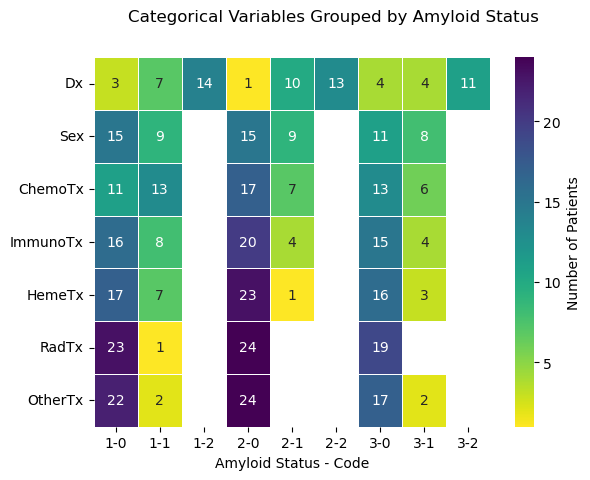

In [181]:
groupname = "Amyloid Status"
dict_category_counts = {}
df_input = df_summary_DxAdj_data
list_categories = ["Dx", "Sex", "ChemoTx", "ImmunoTx", "HemeTx", "RadTx", "OtherTx"]
for category in list_categories: 
    category_counts = df_input.groupby(groupname)[category].value_counts()
    dict_category_counts[category] = category_counts

df_category_counts_forplot = pd.DataFrame.from_dict(dict_category_counts, orient = 'index')

fig, ax = plt.subplots()
ax = sns.heatmap(df_category_counts_forplot.reindex(sorted(df_category_counts_forplot.columns),axis =1), annot=True, linewidths= 0.5, cmap = 'viridis_r', cbar_kws={"label":"Number of Patients"})
ax.set_xlabel("Amyloid Status - Code")
fig.suptitle("Categorical Variables Grouped by Amyloid Status")

fig_file_out = outputFiguresPath(fileName_header=fileNameHeader_all, fileName_mid="heatmap_byAL_", 
                                 fileName_suff= fileNameSuffix, parent_dir=outputDir, folderName=folder_data_out)

fig.savefig(fig_file_out, bbox_inches = "tight")

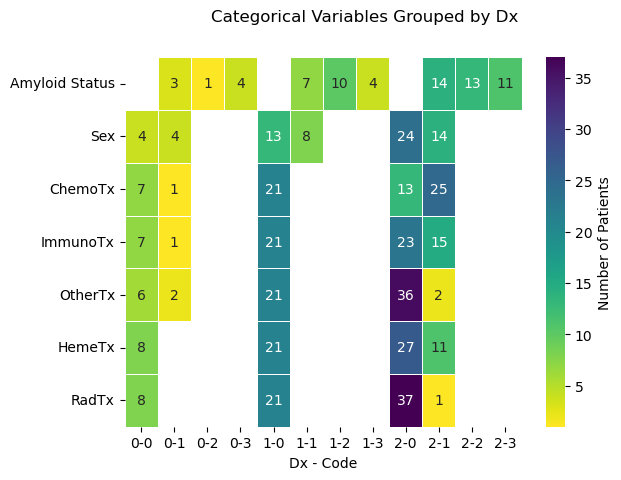

In [182]:
groupname = "Dx"
dict_category_counts = {}
df_input = df_summary_DxAdj_data
list_categories = ["Amyloid Status", "Sex", "ChemoTx", "ImmunoTx", "HemeTx", "RadTx", "OtherTx"]
for category in list_categories: 
    category_counts = df_input.groupby(groupname)[category].value_counts()
    dict_category_counts[category] = category_counts

df_category_counts_forplot = pd.DataFrame.from_dict(dict_category_counts, orient = 'index')

fig, ax = plt.subplots()
ax = sns.heatmap(df_category_counts_forplot.reindex(sorted(df_category_counts_forplot.columns),axis =1), annot=True, linewidths= 0.5, cmap = 'viridis_r', cbar_kws={"label":"Number of Patients"})
ax.set_xlabel("Dx - Code")
fig.suptitle("Categorical Variables Grouped by Dx")

fig_file_out = outputFiguresPath(fileName_header=fileNameHeader_all, fileName_mid="heatmap_byDx_", 
                                 fileName_suff= fileNameSuffix, parent_dir=outputDir, folderName=folder_data_out)

fig.savefig(fig_file_out, bbox_inches = "tight")

In [177]:
print(path)

C:/Users/maega\UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects\Cardiac-Amyloidosis-Multiple-Myeloma\012 Processed Data


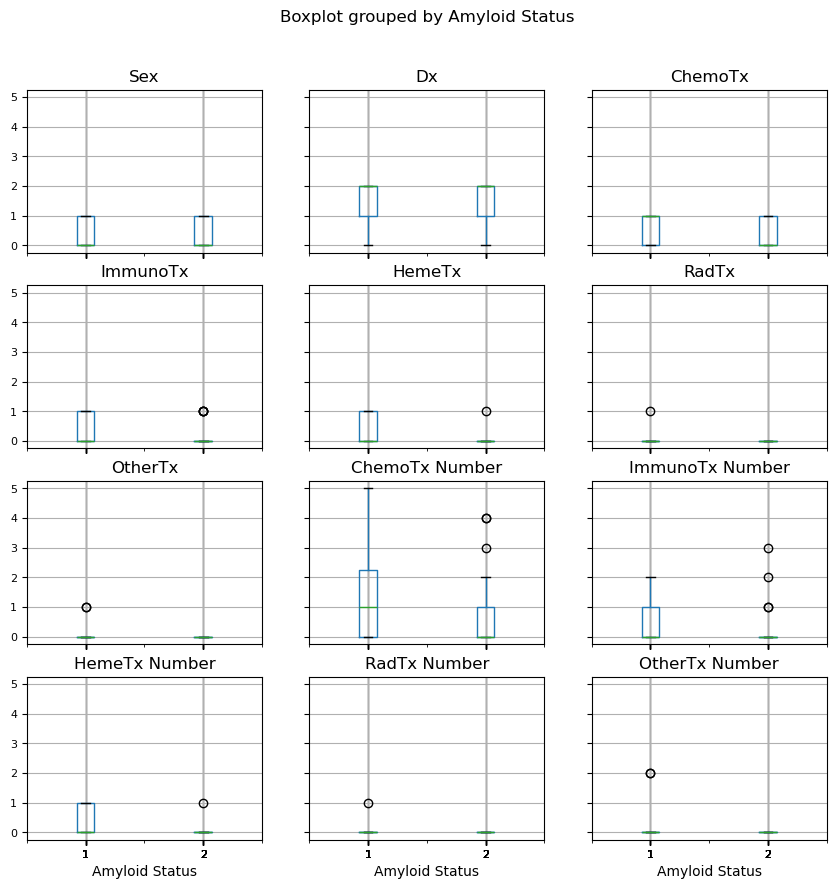

In [153]:
boxplot = df_AL_Known_DxAdj.boxplot(by = "Amyloid Status", column= ["Sex", "Dx", 
                         "ChemoTx", "ImmunoTx", "HemeTx", "RadTx", "OtherTx","ChemoTx Number", "ImmunoTx Number", 
                         "HemeTx Number", "RadTx Number", "OtherTx Number"] ,
                         fontsize = 8, figsize = (10, 10))


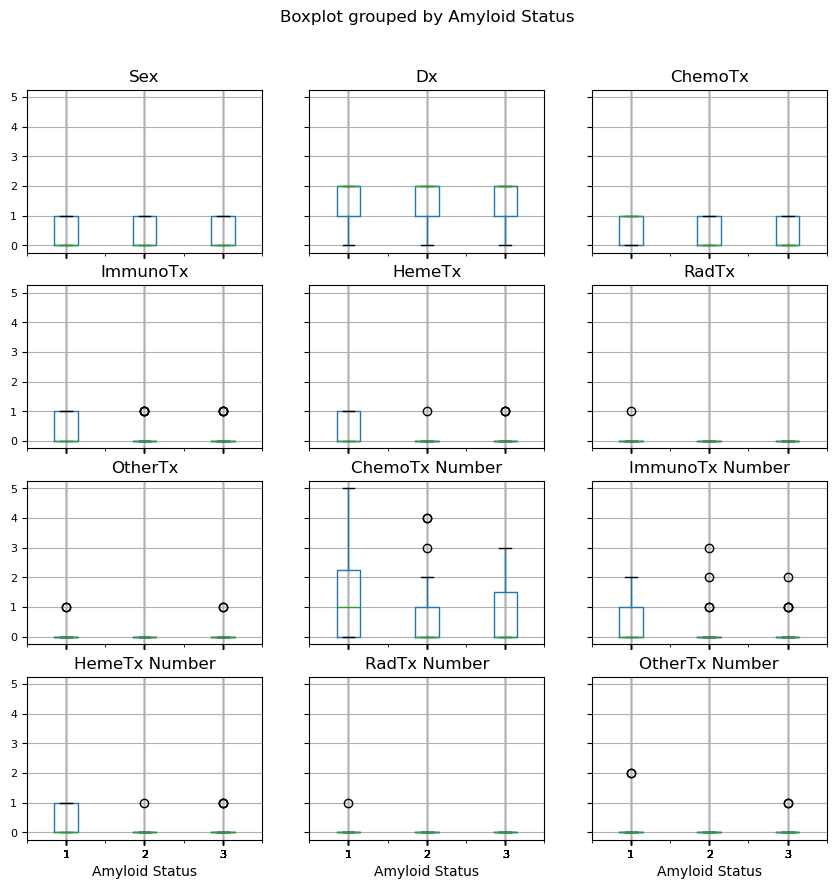

In [154]:
boxplot = df_summary_EchoAdj_data.boxplot(by = "Amyloid Status", column= ["Sex", "Dx", 
                         "ChemoTx", "ImmunoTx", "HemeTx", "RadTx", "OtherTx","ChemoTx Number", "ImmunoTx Number", 
                         "HemeTx Number", "RadTx Number", "OtherTx Number"] ,
                         fontsize = 8, figsize = (10, 10))

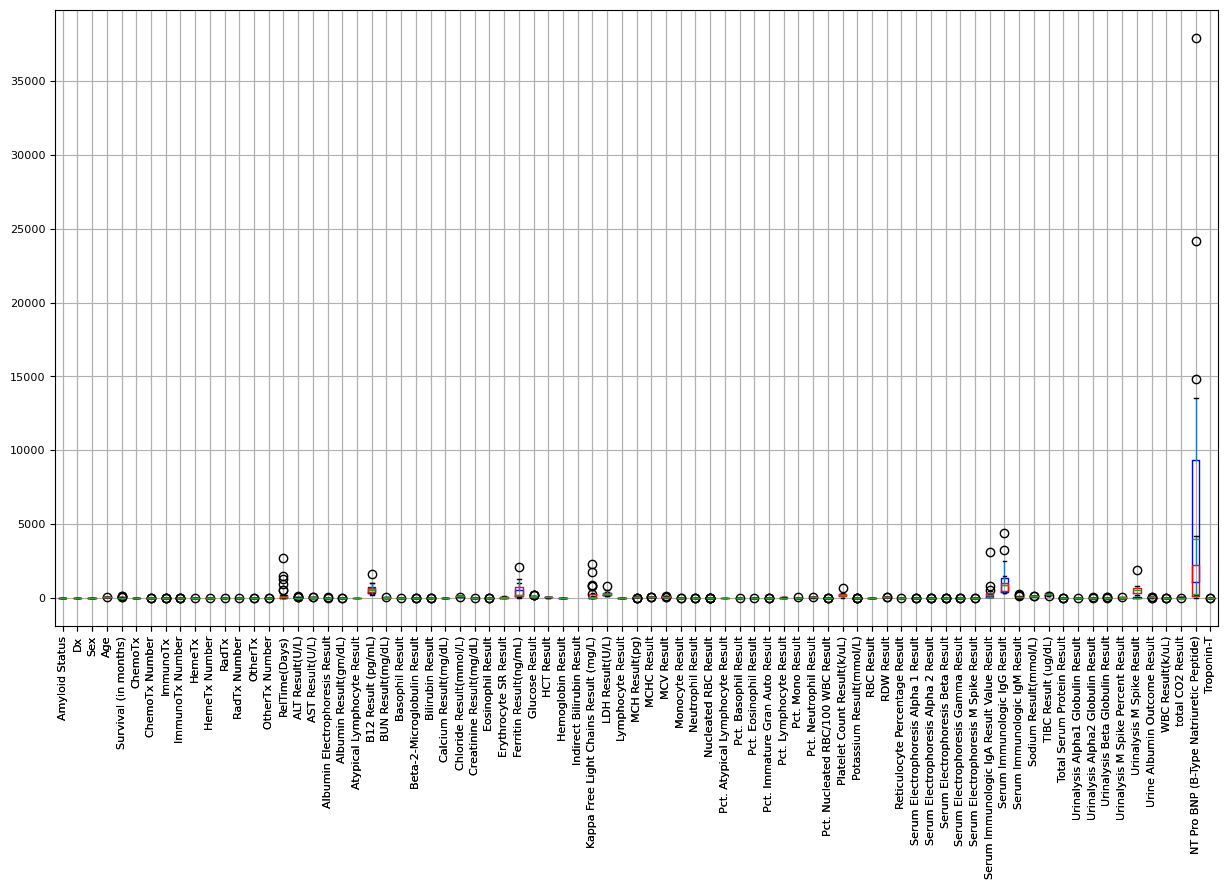

In [217]:
fig, ax = plt.subplots(figsize = (15, 8))
boxprops_dict = {"color" : 'blue', "alpha": 0.5}
boxplot = df_ALPos_DxAdj.boxplot(fontsize = 8, figsize = (15, 8), rot = 90, ax = ax, color = {"boxes" : "blue"} )
boxplot2 = df_ALNeg_DxAdj.boxplot(fontsize = 8, figsize = (15, 8), rot = 90, ax = ax,color = {"boxes" : "red"})

Text(0.5, 1.0, 'Lab values adjacent to diagnostic imaging grouped by Amyloid Status')

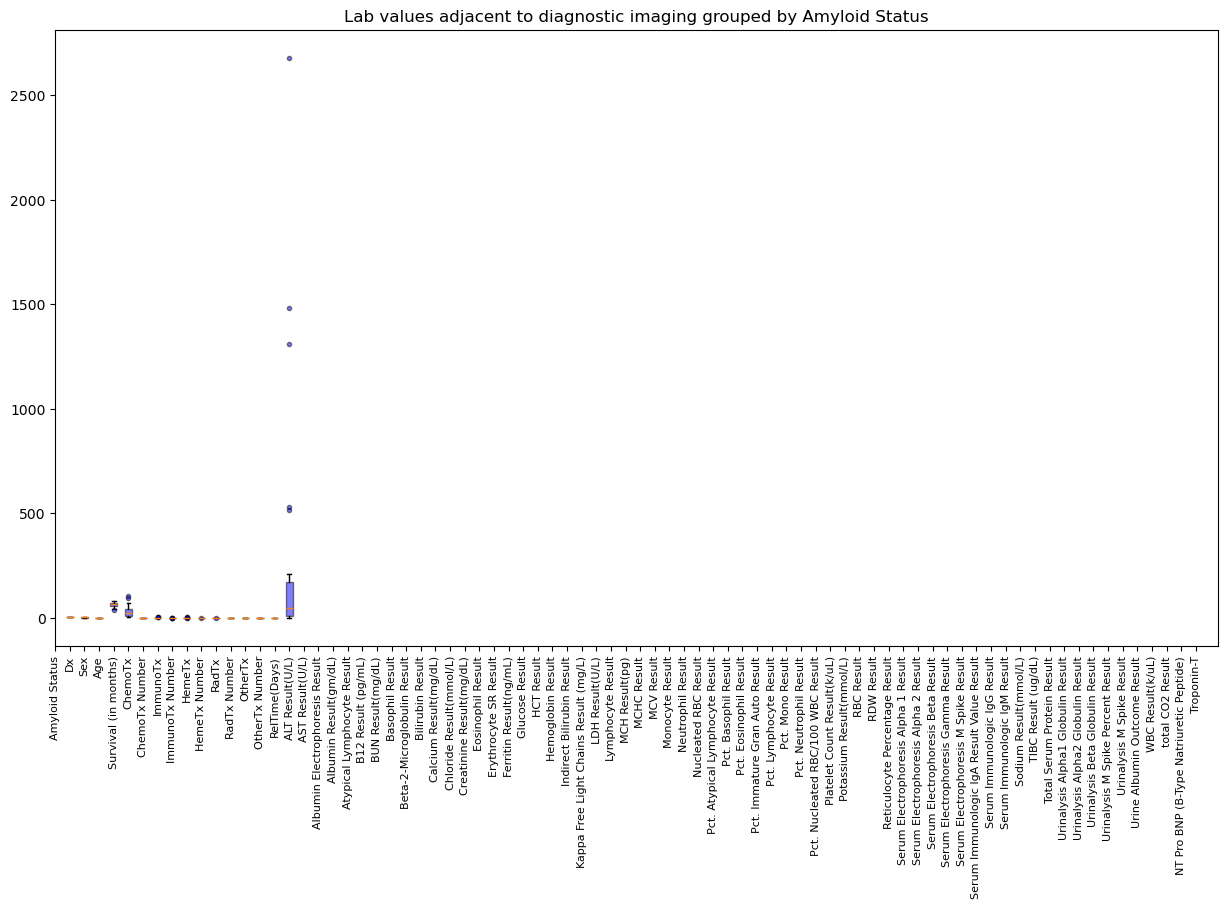

In [201]:
# by amyloid status
#vertical box plot
dataToPlot_positive = df_ALPos_DxAdj
dataToPlot_negative = df_ALNeg_DxAdj

# boxToPlot_allPts = [dataToPlot_positive,dataToPlot_negative]

sorted_columnNames = list(df_ALPos_DxAdj.columns)

fig, ax = plt.subplots(figsize = (15,8))

# boxplot = ax.boxplot(boxToPlot_allPts, patch_artist = True)
ax.boxplot(dataToPlot_positive, patch_artist = True, boxprops={"facecolor" : 'blue', "alpha": 0.5},
                     flierprops = {"marker" : '.', "markersize" : 6, "markerfacecolor" :'blue', "alpha": 0.5})

# boxplot = ax.boxplot(dataToPlot_negative, patch_artist = True, boxprops={"facecolor" : 'red', "alpha": 0.5},
#                      flierprops = {"marker" : '.', "markersize" : 6, "markerfacecolor" :'red', "alpha": 0.5})

# ax.set_xticklabels(sorted_columnNames, rotation = 'vertical', fontsize = 8 )
ax.set_xticks(np.arange(0,len(sorted_columnNames), step =1), sorted_columnNames, rotation = 'vertical', fontsize = 8 )

ax.set_title("Lab values adjacent to diagnostic imaging grouped by Amyloid Status")
# ax.yaxis.set_inverted(True)

# plt.tight_layout()

# figPathBar = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid="-boxALStat_vert_" , 
#                             fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)

# plt.savefig(figPathBar, bbox_inches = 'tight')

## Amyloid negative

amyloid positive patients

In [152]:
# #from the patient positive generate some demographics

# #age distribution
# dataAges = []
# dataSex = []

# for pt in listPositive:
#     data = patientDictAge[pt]
#     dataAges.append(data)
# df_ages = pd.Series(dataAges)
# print("These are the characteristics of age: ", df_ages.describe())

# #sex distribution 

# #dx distribution MM and MGUS

# #characteristics of NT-proBNP 
# dataBNP = []
# for pt in listPositive:
#     data = patientDictLabs[pt]
#     #get the one lab
#     bnp_forpt = data['NT Pro BNP (B-Type Natriuretic Peptide)']
#     bnp_clean = bnp_forpt.dropna()
#     bnp_mean
#     dataBNP.extend(bnp_clean)
# df_bnp = pd.Series(dataBNP)
# print("These are the characteristics of NT-pro BNP: ", df_bnp.describe())

# #kappa-lambda ratio
# dataKLRatio = []
# for pt in listPositive:
#     data = patientDictLabs[pt]
#     #get the one lab
#     KLRatio_forpt = data['Kappa/Lambda Free Light Chain Ratio Result']
#     KLRatio_clean = KLRatio_forpt.dropna()
#     dataKLRatio.extend(KLRatio_clean)
# df_KLRatio = pd.Series(dataKLRatio)
# print("These are the characteristics of kappa-lambda ratio: ", df_KLRatio.describe())

# # m-spike 
# dataMspike = []
# for pt in listPositive:
#     data = patientDictLabs[pt]
#     #get the one lab
#     Mspike_forpt = data['Serum Electrophoresis M Spike Result']
#     Mspike_clean = Mspike_forpt.dropna()
#     dataMspike.extend(Mspike_clean)
# df_Mspike = pd.Series(dataMspike)
# print("These are the characteristics of M-spike: ", df_Mspike.describe())